In [1]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
medi = pd.read_csv('medical_insurance.csv')


In [3]:
medi.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
medi.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [5]:
medi.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
medi[medi.columns[medi.isnull().any()]].isnull().sum()


Series([], dtype: float64)

In [7]:
medi.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
medi.duplicated().sum()


np.int64(1435)

In [9]:
medi[medi.duplicated()]


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.590,0,no,northwest,1639.56310
1338,23,male,34.400,0,no,southwest,1826.84300
1339,56,female,39.820,0,no,southeast,11090.71780
1340,27,male,42.130,0,yes,southeast,39611.75770
1341,19,male,24.600,1,no,southwest,1837.23700
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [10]:
medi = medi.drop_duplicates().reset_index(drop=True)


In [11]:
medi.shape

(1337, 7)

In [12]:
for c in medi.select_dtypes(include='object').columns:
    medi[c] = medi[c].str.strip()


In [13]:
medi['bmi'].max()


np.float64(53.13)

In [14]:
medi['bmi'].min()


np.float64(15.96)

Feature engineering-https://www.thecalculatorsite.com/health/charts/bmi-chart.php 

Adding bmi category based on the bmi chart

In [15]:
medi['bmi_category'] = pd.cut(
    medi['bmi'], 
    bins=[0, 18.5, 24.9, 29.9, float('inf')],
    labels=['underweight', 'normal weight', 'overweight', 'obese']
)


In [16]:
medi.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal weight
4,32,male,28.880,0,no,northwest,3866.85520,overweight


SEX
MALE:0
FEMALE:1

In [17]:
medi['sex'] = medi['sex'].map({'male': 0, 'female': 1})

In [18]:
medi.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,1,27.900,0,yes,southwest,16884.92400,overweight
1,18,0,33.770,1,no,southeast,1725.55230,obese
2,28,0,33.000,3,no,southeast,4449.46200,obese
3,33,0,22.705,0,no,northwest,21984.47061,normal weight
4,32,0,28.880,0,no,northwest,3866.85520,overweight


SMOKER:
YES:1
NO:0

In [19]:
medi['smoker'] = medi['smoker'].map({'no': 0, 'yes': 1})

In [20]:
medi.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,1,27.900,0,1,southwest,16884.92400,overweight
1,18,0,33.770,1,0,southeast,1725.55230,obese
2,28,0,33.000,3,0,southeast,4449.46200,obese
3,33,0,22.705,0,0,northwest,21984.47061,normal weight
4,32,0,28.880,0,0,northwest,3866.85520,overweight


In [21]:
medi["age_group"] = pd.cut(
    medi["age"],
    bins=[1, 30, 45, 60, 100],
    labels=["young", "adult", "middle_age", "senior"]
)


In [22]:
medi.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category,age_group
0,19,1,27.900,0,1,southwest,16884.92400,overweight,young
1,18,0,33.770,1,0,southeast,1725.55230,obese,young
2,28,0,33.000,3,0,southeast,4449.46200,obese,young
3,33,0,22.705,0,0,northwest,21984.47061,normal weight,adult
4,32,0,28.880,0,0,northwest,3866.85520,overweight,adult


In [24]:
medi["very_high_risk"] = (
    (medi["smoker"] == 1) &
    (medi["bmi"] >= 29.9) &
    (medi["age"] >= 40)
).astype(int)



In [26]:
medi.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category,age_group,very_high_risk
0,19,1,27.900,0,1,southwest,16884.92400,overweight,young,0
1,18,0,33.770,1,0,southeast,1725.55230,obese,young,0
2,28,0,33.000,3,0,southeast,4449.46200,obese,young,0
3,33,0,22.705,0,0,northwest,21984.47061,normal weight,adult,0
4,32,0,28.880,0,0,northwest,3866.85520,overweight,adult,0



Very High Risk = Smoker AND BMI ≥ 30 AND Age ≥ 40

In [27]:
medi.groupby("very_high_risk")["charges"].mean()


very_high_risk
0    11486.142126
1    44780.772758
Name: charges, dtype: float64

In [28]:
medi.to_csv("medical_eda.csv", index=False)


In [29]:
medi.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category,age_group,very_high_risk
0,19,1,27.900,0,1,southwest,16884.92400,overweight,young,0
1,18,0,33.770,1,0,southeast,1725.55230,obese,young,0
2,28,0,33.000,3,0,southeast,4449.46200,obese,young,0
3,33,0,22.705,0,0,northwest,21984.47061,normal weight,adult,0
4,32,0,28.880,0,0,northwest,3866.85520,overweight,adult,0


In [30]:
medi = pd.get_dummies(medi, columns=["region"], drop_first=True)


In [31]:
medi.head()

,age,sex,bmi,children,smoker,charges,bmi_category,age_group,very_high_risk,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,overweight,young,0,False,False,True
1,18,0,33.770,1,0,1725.55230,obese,young,0,False,True,False
2,28,0,33.000,3,0,4449.46200,obese,young,0,False,True,False
3,33,0,22.705,0,0,21984.47061,normal weight,adult,0,True,False,False
4,32,0,28.880,0,0,3866.85520,overweight,adult,0,True,False,False


In [32]:
medical = medi.drop(columns=[
    "age_group",
    "bmi_category",
    "very_high_risk"
   
], errors='ignore')

In [33]:
medical.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [34]:
medical.to_csv("medical_models.csv", index=False)


MODELS

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [36]:
medical=pd.read_csv("medical_models.csv")

In [37]:
medical.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [38]:
x = medical.drop("charges", axis=1)
y = medical["charges"]

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [40]:
numeric_cols = ['age', 'bmi', 'children'] 

In [41]:
scaler = StandardScaler()


In [42]:
x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])
x_test[numeric_cols] = scaler.transform(x_test[numeric_cols])

LINEAR REGRESSION

In [64]:
from sklearn.linear_model import LinearRegression


In [65]:
lr = LinearRegression()
lr.fit(x_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [66]:
y_pred = lr.predict(x_test)


In [67]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R2 Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

R2 Score: 0.8069287081198014
MAE: 4177.045561036321
RMSE: 5956.342894363584


In [68]:
coefficients = pd.DataFrame({
    "Feature": x_train.columns,
    "Coefficient": lr.coef_
})

print(coefficients.sort_values(by="Coefficient", ascending=False))


            Feature   Coefficient
4            smoker  23077.764593
0               age   3472.975553
2               bmi   1927.828251
3          children    636.501185
1               sex    101.542054
5  region_northwest   -391.761455
7  region_southwest   -659.139752
6  region_southeast   -838.919616


RANDOM FOREST

In [70]:
from sklearn.ensemble import RandomForestRegressor



In [71]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)


In [72]:
rf.fit(x_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [73]:
y_pred_rf = rf.predict(x_test)


In [75]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest Results")
print("R2 Score:", r2_rf)
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)


Random Forest Results
R2 Score: 0.8773204741118641
MAE: 2676.583256303358
RMSE: 4747.958173323773


In [78]:
import pandas as pd

feature_importance = pd.DataFrame({
    "Feature": x_train.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feature_importance)


            Feature  Importance
4            smoker    0.600777
2               bmi    0.215809
0               age    0.135868
3          children    0.022836
1               sex    0.006787
6  region_southeast    0.006566
5  region_northwest    0.006564
7  region_southwest    0.004794


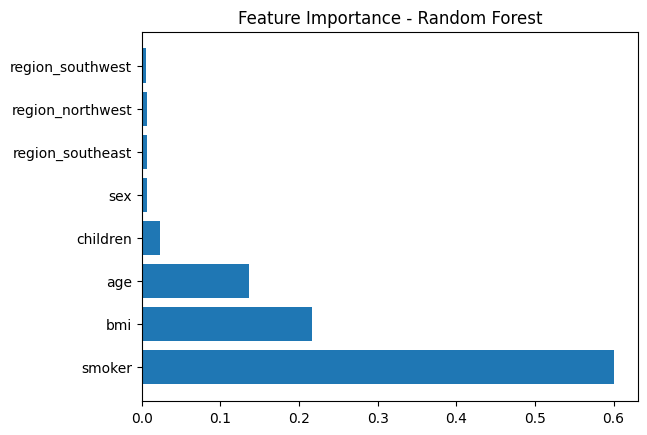

In [80]:

plt.figure()
plt.barh(feature_importance["Feature"], feature_importance["Importance"])
plt.title("Feature Importance - Random Forest")
plt.show()


gridsearch cv random forest

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [88]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2,3,4, 5],
    'min_samples_leaf': [1, 2, 3]
}


In [89]:
rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)


In [90]:
grid_search.fit(x_train, y_train)


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestR...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 3, ...], 'n_estimators': [100, 200, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'r2'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and pa

In [91]:
print("Best Parameters:", grid_search.best_params_)
print("Best R2 (CV Score):", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 400}
Best R2 (CV Score): 0.8327883009430692


In [92]:
best_rf = grid_search.best_estimator_

y_pred_best = best_rf.predict(x_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

print("Tuned Random Forest Results")
print("R2 Score:", r2_score(y_test, y_pred_best))
print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))


Tuned Random Forest Results
R2 Score: 0.8948203973914727
MAE: 2470.892736665753
RMSE: 4396.2927328318265


XGBOOST

In [43]:
import xgboost as xgb


In [44]:
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)


In [45]:
xgb_model.fit(x_train, y_train)


,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,None
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: str | typing.List[str | typing.Callable] | typing.Callable | None.. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = load_diabetes(return_X_y=True) reg = xgb.XGBRegressor( tree_met

In [46]:
y_pred_xgb = xgb_model.predict(x_test)


In [47]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("XGBoost Results")
print("R2 Score:", r2_xgb)
print("MAE:", mae_xgb)
print("RMSE:", rmse_xgb)


XGBoost Results
R2 Score: 0.9019905002694184
MAE: 2484.490609870336
RMSE: 4243.800173091196


In [50]:
feature_names = x_train.columns.tolist()
print(feature_names)


['age', 'sex', 'bmi', 'children', 'smoker', 'region_northwest', 'region_southeast', 'region_southwest']


In [52]:
joblib.dump(feature_names, "models/feature_names.pkl")

print("Feature names saved as .pkl ✅")

Feature names saved as .pkl ✅


xgb gridsearch cv

In [104]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    random_state=42,
    objective='reg:squarederror'
)


In [105]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}


In [106]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)


In [107]:
grid_search.fit(x_train, y_train)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","XGBRegressor(...ree=None, ...)"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'learning_rate': [0.05, 0.1, ...], 'max_depth': [3, 4, ...], 'n_estimators': [100, 200, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'r2'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >

In [108]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV R2:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best CV R2: 0.8438419109277765


In [109]:
best_xgb = grid_search.best_estimator_

y_pred = best_xgb.predict(x_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

print("Test R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Test R2: 0.9025139677937096
MAE: 2463.7708259092815
RMSE: 4232.45195805124


RIDGE REGRESSION

In [110]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)

y_pred_ridge = ridge.predict(x_test)


In [111]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("Ridge Regression Results")
print("R2 Score:", r2_ridge)
print("MAE:", mae_ridge)
print("RMSE:", rmse_ridge)


Ridge Regression Results
R2 Score: 0.8059213292402462
MAE: 4193.891909470003
RMSE: 5971.861740959914


LASSO

In [112]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1, max_iter=10000)

lasso.fit(x_train, y_train)


,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",0.1
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",10000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


We use max_iter=10000 because Lasso sometimes needs more iterations to converge.

In [113]:
y_pred_lasso = lasso.predict(x_test)


In [114]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print("Lasso Regression Results")
print("R2 Score:", r2_lasso)
print("MAE:", mae_lasso)
print("RMSE:", rmse_lasso)


Lasso Regression Results
R2 Score: 0.8069204968402132
MAE: 4177.118763964712
RMSE: 5956.46955399366


In [115]:
coefficients = pd.DataFrame({
    "Feature": x_train.columns,
    "Coefficient": lasso.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coefficients)


            Feature   Coefficient
4            smoker  23077.087323
0               age   3472.911587
2               bmi   1927.590895
3          children    636.414409
1               sex    101.068016
5  region_northwest   -390.075163
7  region_southwest   -657.403877
6  region_southeast   -837.065131


lasso gridsearch cv

In [116]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10]
}

lasso = Lasso(max_iter=10000)

grid_lasso = GridSearchCV(
    lasso,
    param_grid,
    cv=5,
    scoring='r2'
)

grid_lasso.fit(x_train, y_train)

print("Best Alpha:", grid_lasso.best_params_)
print("Best CV R2:", grid_lasso.best_score_)


Best Alpha: {'alpha': 10}
Best CV R2: 0.7258737962976077


In [147]:
best_lasso = grid_lasso.best_estimator_
y_pred_best = best_lasso.predict(x_test)

print("Test R2:", r2_score(y_test, y_pred_best))
print("Test mae",mean_absolute_error(y_test, y_pred_best))
print("Test mse",np.sqrt(mean_squared_error(y_test, y_pred_best)))

Test R2: 0.8060672170116915
Test mae 4184.381197059924
Test mse 5969.61681269981


GRADIENT BOOSTING REGRESSOR

In [118]:
from sklearn.ensemble import GradientBoostingRegressor


In [119]:
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gbr.fit(x_train, y_train)


,"loss loss: {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'Loss function to be optimized. 'squared_error' refers to the squarederror for regression. 'absolute_error' refers to the absolute error ofregression and is a robust loss function. 'huber' is acombination of the two. 'quantile' allows quantile regression (use`alpha` to specify the quantile).See:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_quantile.py`for an example that demonstrates quantile regression for creatingprediction intervals with `loss='quantile'`.",'squared_error'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",100
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are""friedman_mse"" for the mean squared error with improvement score byFriedman, ""squared_error"" for mean squared error. The default value of""friedman_mse"" is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft 

In [120]:
y_pred_gbr = gbr.predict(x_test)


In [121]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2_gbr = r2_score(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))

print("Gradient Boosting Results")
print("R2 Score:", r2_gbr)
print("MAE:", mae_gbr)
print("RMSE:", rmse_gbr)


Gradient Boosting Results
R2 Score: 0.9008563879867465
MAE: 2517.4678305027105
RMSE: 4268.283017604774


gradient boosting grid search cv

In [122]:
param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

grid_gbr = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid_gbr,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid_gbr.fit(x_train, y_train)

print("Best Params:", grid_gbr.best_params_)
print("Best CV R2:", grid_gbr.best_score_)


Fitting 3 folds for each of 486 candidates, totalling 1458 fits
Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.8}
Best CV R2: 0.8466309408533569


In [123]:
best_gbr = grid_gbr.best_estimator_

y_pred = best_gbr.predict(x_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

print("Test R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Test R2: 0.9018789182908127
MAE: 2495.5243094615903
RMSE: 4246.215229393745


ML FLOW

In [1]:
import mlflow
import mlflow.sklearn
import os
tracking_path = r"D:\AVANTHI\Desktop\Medical Insurance\mlruns"
os.makedirs(tracking_path, exist_ok=True)
mlflow.set_tracking_uri(f"file:///{tracking_path}")
import mlflow
import os

mlflow.set_tracking_uri("file:./mlruns")
print("Tracking URI set to:", mlflow.get_tracking_uri())




Tracking URI set to: file:./mlruns


In [130]:
mlflow.set_experiment("Medical Insurance")


2026/02/14 14:18:16 INFO mlflow.tracking.fluent: Experiment with name 'Medical Insurance' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///D:\\AVANTHI\\Desktop\\Medical Insurance\\mlruns/329123060051932312', creation_time=1771058896432, experiment_id='329123060051932312', last_update_time=1771058896432, lifecycle_stage='active', name='Medical Insurance', tags={}>

In [131]:

with mlflow.start_run(run_name="Gradient Boosting"):

    # Log parameters
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("learning_rate", 0.1)
    mlflow.log_param("max_depth", 3)
    mlflow.log_param("random_state", 42)

    # Log metrics
    mlflow.log_metric("R2", r2_gbr)
    mlflow.log_metric("MAE", mae_gbr)
    mlflow.log_metric("RMSE", rmse_gbr)

    # Log model
    mlflow.sklearn.log_model(gbr, "gbr_base_model")


2026/02/14 14:18:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


In [133]:

test_r2 = r2_score(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

with mlflow.start_run(run_name="Gradient Boosting Tuned"):

    # Log best hyperparameters from GridSearch
    for param, value in grid_gbr.best_params_.items():
        mlflow.log_param(param, value)

    # Log cross-validation score
    mlflow.log_metric("CV_R2", grid_gbr.best_score_)

    # Log test metrics
    mlflow.log_metric("Test_R2", test_r2)
    mlflow.log_metric("Test_MAE", test_mae)
    mlflow.log_metric("Test_RMSE", test_rmse)

    # Log tuned model
    mlflow.sklearn.log_model(best_gbr, "gbr_tuned_model")



2026/02/14 14:26:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
d:\AVANTHI\C\Desktop\Medical Insurance\medical\Lib\site-packages\mlflow\models\model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


In [132]:
with mlflow.start_run(run_name="Linear Regression"):

    mlflow.log_param("fit_intercept", lr.fit_intercept)
    mlflow.log_param("n_features", x_train.shape[1])

    mlflow.log_metric("R2", r2)
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("RMSE", rmse)

    mlflow.sklearn.log_model(lr, "linear_regression_model")


2026/02/14 14:24:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


d:\AVANTHI\C\Desktop\Medical Insurance\medical\Lib\site-packages\mlflow\models\model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


In [134]:
import mlflow.sklearn

with mlflow.start_run(run_name="Random Forest Base"):

    # Log parameters
    mlflow.log_param("n_estimators", rf.n_estimators)
    mlflow.log_param("random_state", rf.random_state)
    mlflow.log_param("max_depth", rf.max_depth)
    mlflow.log_param("min_samples_split", rf.min_samples_split)
    mlflow.log_param("min_samples_leaf", rf.min_samples_leaf)

    # Log metrics
    mlflow.log_metric("R2", r2_rf)
    mlflow.log_metric("MAE", mae_rf)
    mlflow.log_metric("RMSE", rmse_rf)

    # Log model
    mlflow.sklearn.log_model(rf, "random_forest_model")



2026/02/14 14:28:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


In [135]:

with mlflow.start_run(run_name="Random Forest Tuned"):

    # Log best hyperparameters
    for param, value in grid_search.best_params_.items():
        mlflow.log_param(param, value)

    # Log cross-validation score
    mlflow.log_metric("CV_R2", grid_search.best_score_)

    # Log test metrics
    mlflow.log_metric("Test_R2", test_r2)
    mlflow.log_metric("Test_MAE", test_mae)
    mlflow.log_metric("Test_RMSE", test_rmse)

    # Log tuned model
    mlflow.sklearn.log_model(best_rf, "random_forest_tuned_model")




2026/02/14 14:30:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


In [142]:
import mlflow
import mlflow.xgboost

with mlflow.start_run(run_name="XGBoost Base"):

    # Log parameters
    mlflow.log_param("n_estimators", xgb_model.n_estimators)
    mlflow.log_param("learning_rate", xgb_model.learning_rate)
    mlflow.log_param("max_depth", xgb_model.max_depth)
    mlflow.log_param("random_state", xgb_model.random_state)

    # Log metrics
    mlflow.log_metric("R2", r2_xgb)
    mlflow.log_metric("MAE", mae_xgb)
    mlflow.log_metric("RMSE", rmse_xgb)

    # Log model
    mlflow.xgboost.log_model(xgb_model, "xgboost_base_model")



2026/02/14 14:33:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


In [144]:
test_r2_xgb = r2_score(y_test, y_pred)
test_mae_xgb = mean_absolute_error(y_test, y_pred)
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))

import mlflow.xgboost

with mlflow.start_run(run_name="XGBoost Tuned"):

    # Log best hyperparameters
    for param, value in grid_search.best_params_.items():
        mlflow.log_param(param, value)

    # Log CV score
    mlflow.log_metric("CV_R2", grid_search.best_score_)

    # Log test metrics
    mlflow.log_metric("Test_R2", test_r2_xgb)
    mlflow.log_metric("Test_MAE", test_mae_xgb)
    mlflow.log_metric("Test_RMSE", test_rmse_xgb)

    # Log tuned model
    mlflow.xgboost.log_model(best_xgb, "xgboost_tuned_model")



2026/02/14 14:36:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


In [145]:
import mlflow.sklearn

with mlflow.start_run(run_name="Ridge Regression"):

    # Log parameters
    mlflow.log_param("alpha", ridge.alpha)
    mlflow.log_param("fit_intercept", ridge.fit_intercept)
    mlflow.log_param("solver", ridge.solver)

    # Log metrics
    mlflow.log_metric("R2", r2_ridge)
    mlflow.log_metric("MAE", mae_ridge)
    mlflow.log_metric("RMSE", rmse_ridge)

    # Log model
    mlflow.sklearn.log_model(ridge, "ridge_regression_model")



2026/02/14 14:37:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
d:\AVANTHI\C\Desktop\Medical Insurance\medical\Lib\site-packages\mlflow\models\model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


In [146]:
import mlflow.sklearn

with mlflow.start_run(run_name="Lasso Regression"):

    # Log parameters
    mlflow.log_param("alpha", lasso.alpha)
    mlflow.log_param("max_iter", lasso.max_iter)
    mlflow.log_param("fit_intercept", lasso.fit_intercept)

    # Log metrics
    mlflow.log_metric("R2", r2_lasso)
    mlflow.log_metric("MAE", mae_lasso)
    mlflow.log_metric("RMSE", rmse_lasso)

    # Log model
    mlflow.sklearn.log_model(lasso, "lasso_regression_model")



2026/02/14 14:38:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


In [149]:
test_r2_lasso = r2_score(y_test, y_pred_best)
test_mae_lasso = mean_absolute_error(y_test, y_pred_best)
test_rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_best))

import mlflow.sklearn

with mlflow.start_run(run_name="Lasso Regression Tuned"):

    # Log best hyperparameter
    mlflow.log_param("alpha", grid_lasso.best_params_['alpha'])
    mlflow.log_param("max_iter", best_lasso.max_iter)

    # Log CV score
    mlflow.log_metric("CV_R2", grid_lasso.best_score_)

    # Log test metrics
    mlflow.log_metric("Test_R2", test_r2_lasso)
    mlflow.log_metric("Test_MAE", test_mae_lasso)
    mlflow.log_metric("Test_RMSE", test_rmse_lasso)

    # Log tuned model
    mlflow.sklearn.log_model(best_lasso, "lasso_tuned_model")




2026/02/14 14:42:44 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
d:\AVANTHI\C\Desktop\Medical Insurance\medical\Lib\site-packages\mlflow\models\model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


In [ ]:
import joblib


In [ ]:
joblib.dump(grid_search_gbr, "gradient_boost_model.pkl")


['gradient_boost_model.pkl']

In [ ]:
import os
os.makedirs("model", exist_ok=True)
joblib.dump(scaler, "model/scaler.pkl")

['model/scaler.pkl']

In [ ]:
joblib.dump(x.columns.tolist(), "model/feature_names.pkl")


['model/feature_names.pkl']

In [ ]:
df.head(15)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_normal weight,bmi_category_overweight,bmi_category_obese
0,19,1,27.900,0,1,16884.92400,False,False,True,False,True,False
1,18,0,33.770,1,0,1725.55230,False,True,False,False,False,True
2,28,0,33.000,3,0,4449.46200,False,True,False,False,False,True
3,33,0,22.705,0,0,21984.47061,True,False,False,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False,False,True,False
5,31,1,25.740,0,0,3756.62160,False,True,False,False,True,False
6,46,1,33.440,1,0,8240.58960,False,True,False,False,False,True
7,37,1,27.740,3,0,7281.50560,True,False,False,False,True,False
8,37,0,29.830,2,0,6406.41070,False,False,False,False,True,False
9,60,1,25.840,0,0,28923.13692,True,False,False,False,True,False


In [2]:
import os

os.makedirs("models", exist_ok=True)


In [48]:
import joblib

joblib.dump(xgb_model, "models/xgb_model.pkl")

print("XGBoost model saved inside models folder ")


XGBoost model saved inside models folder 


In [49]:
joblib.dump(scaler, "models/scaler.pkl")


['models/scaler.pkl']